# Deep Learning with Keras: Fashion MNIST dataset

In [4]:
from keras.datasets import fashion_mnist

(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

In [2]:
from keras.utils import to_categorical
y_train = to_categorical(y_train)
#y_test = to_categorical(y_test)

In [5]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(60000, 28, 28)
(10000, 28, 28)
(60000,)
(10000,)


We have a data set composed by 70 000 images of clothes from Zalando:
- 60 000 images in the training set
- 10 000 images in the testing set

Each image is formed by 28x28=784 pixels encoded in greyscale (0-255). starting from zero (white), the higher the number, the darker is the pixel.

Pictures are dirtibuted across 10 different classes:
- 0 T-shirt/top
- 1 Trouser
- 2 Pullover
- 3 Dress
- 4 Coat
- 5 Sandal
- 6 Shirt
- 7 Sneaker
- 8 Bag
- 9 Ankle boot 

In [6]:
print(type(x_train))

<class 'numpy.ndarray'>


In [7]:
print(x_train[1, :, :])

[[  0   0   0   0   0   1   0   0   0   0  41 188 103  54  48  43  87 168
  133  16   0   0   0   0   0   0   0   0]
 [  0   0   0   1   0   0   0  49 136 219 216 228 236 255 255 255 255 217
  215 254 231 160  45   0   0   0   0   0]
 [  0   0   0   0   0  14 176 222 224 212 203 198 196 200 215 204 202 201
  201 201 209 218 224 164   0   0   0   0]
 [  0   0   0   0   0 188 219 200 198 202 198 199 199 201 196 198 198 200
  200 200 200 201 200 225  41   0   0   0]
 [  0   0   0   0  51 219 199 203 203 212 238 248 250 245 249 246 247 252
  248 235 207 203 203 222 140   0   0   0]
 [  0   0   0   0 116 226 206 204 207 204 101  75  47  73  48  50  45  51
   63 113 222 202 206 220 224   0   0   0]
 [  0   0   0   0 200 222 209 203 215 200   0  70  98   0 103  59  68  71
   49   0 219 206 214 210 250  38   0   0]
 [  0   0   0   0 247 218 212 210 215 214   0 254 243 139 255 174 251 255
  205   0 215 217 214 208 220  95   0   0]
 [  0   0   0  45 226 214 214 215 224 205   0  42  35  60  16  1

In [8]:
import matplotlib.pyplot as plt
plt.imshow(x_train[1000], cmap=plt.cm.gray_r)
plt.show()

<Figure size 640x480 with 1 Axes>

On voit ici l'image d'un pantalon.

In [9]:
print(y_train[1000])

1


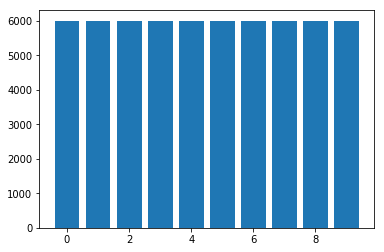

In [10]:
import numpy as np

plt.bar(np.unique(y_train), np.bincount(y_train))
plt.show()

In [11]:
np.bincount(y_train)

array([6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000],
      dtype=int64)

Each cloth appears 6 000 in the training set.

### Feature scaling

In [14]:
x_train_scaled = x_train / 255
x_test_scaled = x_test / 255

In [15]:
x_train_scaled_reshape = x_train_scaled.reshape((60000, 28, 28, 1))
x_test_scaled_reshape = x_test_scaled.reshape((10000, 28, 28, 1))

# Convolutional Neural Network (CNN)

### a) Import of libraries 

In [16]:
from keras.layers import Flatten, Dense, Conv2D, MaxPooling2D
from keras.activations import relu, sigmoid, softmax
from keras.models import Sequential
from keras.optimizers import SGD, Adam
from keras.initializers import glorot_uniform
import numpy as np

### b) Construction of the model

In [18]:
from keras.activations import relu, softmax
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout
from keras.models import Sequential

nb_classes=len(np.unique(y_train))
nb_height=x_train_scaled_reshape.shape[1]
nb_width=x_train_scaled_reshape.shape[2]
nb_channels=x_train_scaled_reshape.shape[3]

cnn_clothes=Sequential()

cnn_clothes.add(Conv2D(filters=32, kernel_size=(3,3), activation=relu, input_shape=(nb_height, nb_width, nb_channels)))
cnn_clothes.add(MaxPooling2D(pool_size=(2,2)))
cnn_clothes.add(Dropout(rate=0.4))

cnn_clothes.add(Conv2D(filters=64, kernel_size=(3,3), activation=relu))
cnn_clothes.add(MaxPooling2D(pool_size=(2,2)))
cnn_clothes.add(Dropout(rate=0.4))

cnn_clothes.add(Conv2D(filters=128, kernel_size=(2,2), activation=relu))
cnn_clothes.add(Conv2D(filters=128, kernel_size=(2,2), activation=relu))

cnn_clothes.add(Flatten())
cnn_clothes.add(Dropout(rate=0.4))

cnn_clothes.add(Dense(units=nb_classes, activation=softmax))

In [19]:
cnn_clothes.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 4, 4, 128)         32896     
__________

### c) Compilation of the model 

In [20]:
cnn_clothes.compile(optimizer='adam', 
                    loss='sparse_categorical_crossentropy', 
                    metrics=['accuracy'])

### d) Fitting of the model

In [21]:
cnn_clothes.fit(x_train_scaled_reshape, y_train,  batch_size=512, epochs=20)

Epoch 1/20
60000/60000 [==============================] - 71s 1ms/step - loss: 1.0172 - acc: 0.6187
Epoch 2/20
60000/60000 [==============================] - 69s 1ms/step - loss: 0.6009 - acc: 0.7714
Epoch 3/20
60000/60000 [==============================] - 69s 1ms/step - loss: 0.5249 - acc: 0.8026
Epoch 4/20
60000/60000 [==============================] - 69s 1ms/step - loss: 0.4696 - acc: 0.8250
Epoch 5/20
60000/60000 [==============================] - 68s 1ms/step - loss: 0.4399 - acc: 0.8391
Epoch 6/20
60000/60000 [==============================] - 69s 1ms/step - loss: 0.4125 - acc: 0.8483
Epoch 7/20
60000/60000 [==============================] - 69s 1ms/step - loss: 0.3885 - acc: 0.8567
Epoch 8/20
60000/60000 [==============================] - 68s 1ms/step - loss: 0.3732 - acc: 0.8650
Epoch 9/20
60000/60000 [==============================] - 68s 1ms/step - loss: 0.3583 - acc: 0.8699
Epoch 10/20
60000/60000 [==============================] - 71s 1ms/step - loss: 0.3504 - acc: 0.8719

### e) Predictions on the test set

In [22]:
predictions_cnn = cnn_clothes.predict_classes(x_test_scaled_reshape)

## Predictive Performance

In [23]:
from sklearn.metrics import accuracy_score

metric_cnn = accuracy_score(y_test, predictions_cnn)
print(metric_cnn)

0.9002


## Model saving

### We save the model structure in the yaml format (layers, activation functions, dimensions, ...)

In [24]:
from keras.models import model_from_yaml

### On sauve la strcture du modèle (couches, fonctions d'activations, dimensions, ...)
model_yaml = cnn_clothes.to_yaml()
with open("cnn_clothes.yaml", "w") as yaml_file:
    yaml_file.write(model_yaml)

### We save the set of weights of the model in the h5 format

In [25]:
### We save the 84 600 weights
cnn_clothes.save_weights("cnn_clothes.h5")
print("Saved model to disk")

Saved model to disk


## Loading of the model

In [26]:
yaml_file = open('cnn_clothes.yaml', 'r')
loaded_model_yaml = yaml_file.read()
yaml_file.close()
loaded_model = model_from_yaml(loaded_model_yaml)
# load weights into new model
loaded_model.load_weights("cnn_clothes.h5")
print("Loaded model from disk")

Loaded model from disk


In [27]:
loaded_model.weights

[<tf.Variable 'conv2d_1_1/kernel:0' shape=(3, 3, 1, 32) dtype=float32_ref>,
 <tf.Variable 'conv2d_1_1/bias:0' shape=(32,) dtype=float32_ref>,
 <tf.Variable 'conv2d_2_1/kernel:0' shape=(3, 3, 32, 64) dtype=float32_ref>,
 <tf.Variable 'conv2d_2_1/bias:0' shape=(64,) dtype=float32_ref>,
 <tf.Variable 'conv2d_3_1/kernel:0' shape=(2, 2, 64, 128) dtype=float32_ref>,
 <tf.Variable 'conv2d_3_1/bias:0' shape=(128,) dtype=float32_ref>,
 <tf.Variable 'conv2d_4_1/kernel:0' shape=(2, 2, 128, 128) dtype=float32_ref>,
 <tf.Variable 'conv2d_4_1/bias:0' shape=(128,) dtype=float32_ref>,
 <tf.Variable 'dense_1_1/kernel:0' shape=(1152, 10) dtype=float32_ref>,
 <tf.Variable 'dense_1_1/bias:0' shape=(10,) dtype=float32_ref>]

In [28]:
loaded_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 4, 4, 128)         32896     
__________

In [30]:
for layer in cnn_clothes.layers:
    g=layer.get_config()
    h=layer.get_weights()
    print (g)
    print (h)

{'name': 'conv2d_1', 'trainable': True, 'batch_input_shape': (None, 28, 28, 1), 'dtype': 'float32', 'filters': 32, 'kernel_size': (3, 3), 'strides': (1, 1), 'padding': 'valid', 'data_format': 'channels_last', 'dilation_rate': (1, 1), 'activation': 'relu', 'use_bias': True, 'kernel_initializer': {'class_name': 'VarianceScaling', 'config': {'scale': 1.0, 'mode': 'fan_avg', 'distribution': 'uniform', 'seed': None}}, 'bias_initializer': {'class_name': 'Zeros', 'config': {}}, 'kernel_regularizer': None, 'bias_regularizer': None, 'activity_regularizer': None, 'kernel_constraint': None, 'bias_constraint': None}
[array([[[[-1.43251672e-01,  2.71622203e-02, -1.78208917e-01,
          -1.69303000e-01,  3.85454632e-02, -7.49447227e-01,
          -1.94340460e-02,  4.48700450e-02, -5.46016097e-02,
          -2.19114289e-01, -1.63349152e-01,  4.73828129e-02,
          -1.56528175e-01, -7.87183195e-02,  4.36300077e-02,
           2.42766049e-02, -1.99348956e-01, -7.98882991e-02,
          -4.12349291

In [ ]:
# Import the plotting function
from keras.utils import plot_model
import matplotlib.pyplot as plt

# Summarize the model
model.summary()

# Plot the model
plot_model(model, to_file='model.png')

# Display the image
data = plt.imread('model.png')
plt.imshow(data)
plt.show()